In [28]:
# Importing the libraries

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import gensim
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedLineDocument
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pandas as pd
import json
import seaborn as sns
import numpy as np
pd.options.display.max_colwidth = 1000
import warnings
warnings.filterwarnings("ignore")

In [4]:
model = gensim.models.KeyedVectors.load_word2vec_format('german.model', binary=True)

#### Let's see if our embedding really understand the underlying context and meaning of the term in the data-set

In [5]:
def draw_words(model, words, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    """
    function draw_words
    reduces dimensionality of vectors of given words either with PCA or with t-SNE
    and draws the words into a diagram
    @param word2vec model     to visualize vectors from
    @param list     words     list of word strings to visualize
    @param bool     pca       use PCA (True) or t-SNE (False) to reduce dimensionality 
    @param bool     alternate use different color and label align for every second word
    @param bool     arrows    use arrows to connect related words (items that are next to each other in list)
    @param float    x1        x axis range (from)
    @param float    x2        x axis range (to)
    @param float    y1        y axis range (from)
    @param float    y2        y axis range (to)
    @param string   title     for diagram
    """
    
    # get vectors for given words from model
    vectors = [model[word] for word in words]

    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(vectors)

    # draw image
    plt.figure(figsize=(6,6))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d , words):
        # plot points
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        # plot word annotations
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    # draw arrows
    if arrows:
        for i in range(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()

With the model and the draw_words() function a list of words can be plotted. When 2 word classes are given (like the first 3 following examples), put them alternately in the list and set the alternate parameter of the function to True. That procuces arrows and improved label positions. The German word to vector was borrowed from https://devmount.github.io/GermanWordEmbeddings/

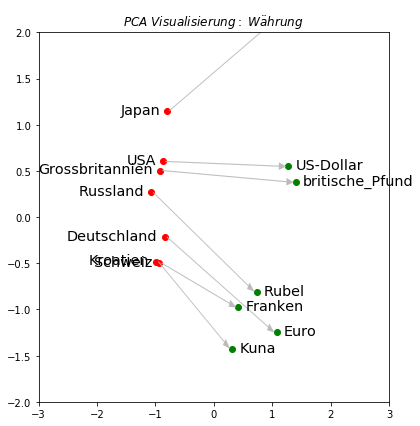

In [6]:
# plot currencies
words = ["Schweiz","Franken","Deutschland","Euro","Grossbritannien","britische_Pfund","Japan","Yen","Russland","Rubel","USA","US-Dollar","Kroatien","Kuna"]
draw_words(model, words, True, True, True, -3, 3, -2, 2, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')

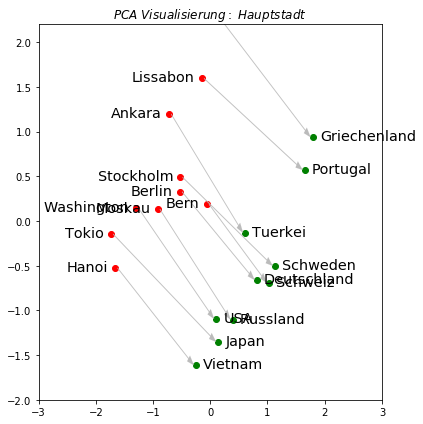

In [7]:
# plot capitals
words  = ["Athen","Griechenland","Berlin","Deutschland","Ankara","Tuerkei","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
draw_words(model, words, True, True, True, -3, 3, -2, 2.2, r'$PCA\ Visualisierung:\ Hauptstadt$')

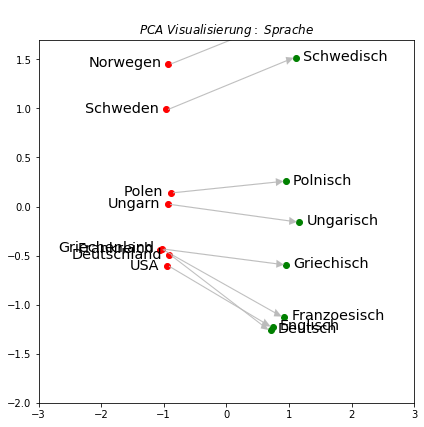

In [8]:
# plot language
words = ["Deutschland","Deutsch","USA","Englisch","Frankreich","Franzoesisch","Griechenland","Griechisch","Norwegen","Norwegisch","Schweden","Schwedisch","Polen","Polnisch","Ungarn","Ungarisch"]
draw_words(model, words, True, True, True, -3, 3, -2, 1.7, r'$PCA\ Visualisierung:\ Sprache$')

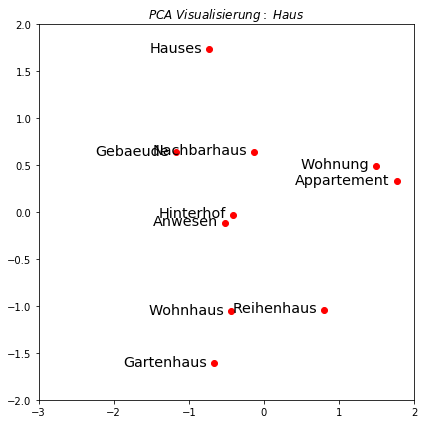

In [9]:
# plot related words to 'house'
matches = model.most_similar(positive=["Haus"], negative=[], topn=10)
words = [match[0] for match in matches]
draw_words(model, words, True, False, False, -3, 2, -2, 2, r'$PCA\ Visualisierung:\ Haus$')

As we all know that the embedding we are using as of now is not for our domain but of varied topic coming in newspapers. Obviously, it contain many words which might be occuring in our data-set as well but it's always benificial to have your own domain specific embedding, which allows machine learning model to capture contaxt of the term appearing for our use cases. 

### Let's read the given data and see some more statistics

In [20]:
path = '/home/niraj/Documents/Challenges/Brain_one/reviews_Clothing_Shoes_and_Jewelry_5.json'

data = []
for line in open(path, 'r'):
    data.append(json.loads(line))

In [17]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278677 entries, 0 to 278676
Data columns (total 9 columns):
asin              278677 non-null object
helpful           278677 non-null object
overall           278677 non-null float64
reviewText        278677 non-null object
reviewTime        278677 non-null object
reviewerID        278677 non-null object
reviewerName      278225 non-null object
summary           278677 non-null object
unixReviewTime    278677 non-null int64
dtypes: float64(1), int64(1), object(7)
memory usage: 19.1+ MB


In [27]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,rating
0,0000031887,"[0, 0]",5.0,This is a great tutu and at a really great price. It doesn't look cheap at all. I'm so glad I looked on Amazon and found such an affordable tutu that isn't made poorly. A++,"02 12, 2011",A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800,+1
1,0000031887,"[0, 0]",5.0,"I bought this for my 4 yr old daughter for dance class, she wore it today for the first time and the teacher thought it was adorable. I bought this to go with a light blue long sleeve leotard and was happy the colors matched up great. Price was very good too since some of these go for over $15.00 dollars.","01 19, 2013",A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600,+1
2,0000031887,"[0, 0]",5.0,"What can I say... my daughters have it in orange, black, white and pink and I am thinking to buy for they the fuccia one. It is a very good way for exalt a dancer outfit: great colors, comfortable, looks great, easy to wear, durables and little girls love it. I think it is a great buy for costumer and play too.","01 4, 2013",A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600,+1
3,0000031887,"[0, 0]",5.0,"We bought several tutus at once, and they are got high reviews. Sturdy and seemingly well-made. The girls have been wearing them regularly, including out to play, and the tutus have stood up well. Fits the 3-yr old & the 5-yr old well. Clearly plenty of room to grow. Only con is that when the kids pull off the tutus, the waste band gets twisted, and an adult has to un-tangle. But this is not difficult.","04 27, 2014",A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800,+1
4,0000031887,"[0, 0]",5.0,"Thank you Halo Heaven great product for Little Girls. My Great Grand Daughters Love these Tutu's. Will buy more from this seller. Made well and cute on the girls. Thanks for a great product.NEVER BUY FROM DRESS UP DREAMS........I will buy more as long as I don't buy from &#34;Dress Up Dreams&#34; I never rec'd or order in FL. Only rec'd pink, the purple one was missing. Company is a rip off. REFUSES to make good on purchase...... Real creeps.","03 15, 2014",A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600,+1


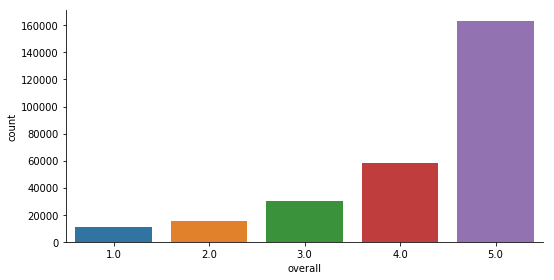

In [29]:
sns.factorplot(x='overall',data=df,kind='count',size=4,aspect=1.9)

In [22]:
df["rating"] = np.nan
df.loc[df.overall == 5.0, 'rating'] = "+1"
df.loc[df.overall == 4.0, 'rating'] = "+1"
df.loc[df.overall == 2.0, 'rating'] = "-1"
df.loc[df.overall == 1.0, 'rating'] = "-1"

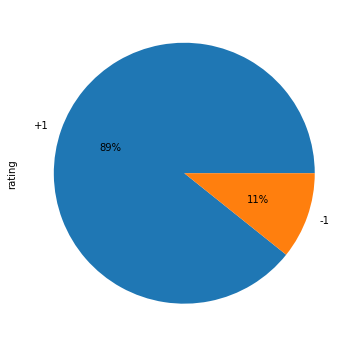

In [26]:
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size
df.rating.value_counts().plot(kind='pie', autopct='%1.0f%%')

#### It is safe to say that we have class imbalance which is another problem is supervise ML domain
We have almost 90% positive reviews and only smnall fraction comes under nagetive. We are not going to solve it here. However, there are plenty of methods that can be used.

> Please follow `.py file` for modelling of ML model and evaluation etc